# Florida Insurance Portfolio Data

## INTRODUCTION
### Data Source

    
    
    https://support.spatialkey.com/spatialkey-sample-csv-data/

###  _The csv has information of 36,634 policies. It includes 18 features (columns) such as geographical information (Longitude and Latitude), house type (residential or commercial), construction type (wood, masonry, Steel Frame, etc..), and so on._ 

> The Data is as follows: 
- policyID
- statecode
- County
- eq_site_limit - Earth Quake Damage Recovery Limit
- eq_site_deductible - Earth Quake Damage Deductible Amount
- hu_site_limit - Hurricane Damage Recovery Limit
- hu_site_deductible - Hurricane Damage Deductible Amount
- fl_site_limit - Flood Damage Recovery Limit
- fl_site_deductible - Flood Damage Deductible Amount
- fr_site_limit - Fire Damage Recovery Limit
- fr_site_deductible - Fire Damage Deductible Amount
- point latitude
- point longitude
- line - Type of House (Residential or Commercial)
- construction - (Wood, Masonry, Steel Frame, Reinforced Concrete, Reinforced Masonry)
- point_granularity
- tiv_2011 - Total Insured Value for the year 2011
- tiv_2012 - Total Insured Value for the year 2012

In [ ]:
# Few methods like countplot, catplot are in 0.9.0
# So I have installed this latest version

!pip install seaborn==0.9.0

## Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
My_Data = pd.read_csv ("FL_insurance_sample.csv")

In [3]:
My_Data.shape

(36634, 18)

In [4]:
My_Data.columns

Index(['policyID', 'statecode', 'county', 'eq_site_limit', 'hu_site_limit',
       'fl_site_limit', 'fr_site_limit', 'tiv_2011', 'tiv_2012',
       'eq_site_deductible', 'hu_site_deductible', 'fl_site_deductible',
       'fr_site_deductible', 'point_latitude', 'point_longitude', 'line',
       'construction', 'point_granularity'],
      dtype='object')

In [5]:
My_Data.count()

policyID              36634
statecode             36634
county                36634
eq_site_limit         36634
hu_site_limit         36634
fl_site_limit         36634
fr_site_limit         36634
tiv_2011              36634
tiv_2012              36634
eq_site_deductible    36634
hu_site_deductible    36634
fl_site_deductible    36634
fr_site_deductible    36634
point_latitude        36634
point_longitude       36634
line                  36634
construction          36634
point_granularity     36634
dtype: int64

## Data Inconsistences

>  As you can see above there is no missing data in any column of the data. But the problem with the data is there is no explanation for the features in the data (i.e., data columns). <br> <br>We may not get the understanding even online unless we know something about the Insurance domain. (For Example: eq_site_deductible - doesn't make any sense or there is no way we can identify eq as Earth Quake without prior knowledge, hu as Hurricane etc..) 

In [6]:
My_Data.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1




> ### Catergorical Columns 
- statecode
- county
- line
- construction
- point_granularity

#### Now, let us see the counts of each category in the Data 

In [7]:
sns.set(style="ticks", color_codes=True)

#### Line
> The plot below has : 
 - X axis - Types of Houses
 - Y axis - Number of houses as such type on 

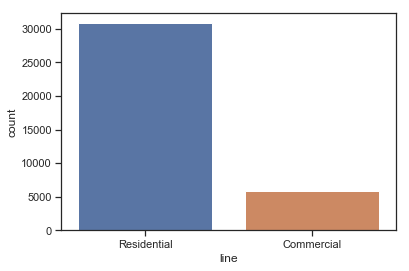

In [8]:
sns.countplot(x = "line", data = My_Data)
plt.show()

#### Construction

In [9]:
My_Data['construction'].value_counts()

Wood                   21581
Masonry                 9257
Reinforced Masonry      4225
Reinforced Concrete     1299
Steel Frame              272
Name: construction, dtype: int64

> The plot below has : 
 - X axis - Construction type
 - Y axis - Count 

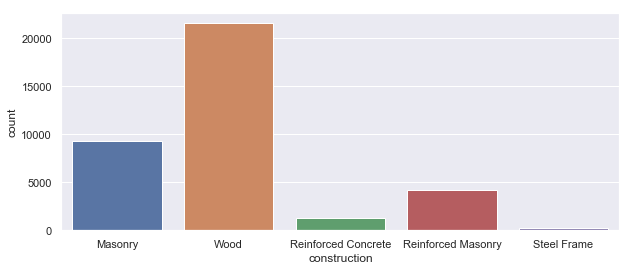

In [10]:
sns.set(rc={'figure.figsize':(10,4)})
My_Data['construction'].value_counts()
sns.countplot(x = "construction", data = My_Data)
plt.show()

#### Construction vs Line
> The plot below has : 
 - X axis - Construction type
 - Y axis - Count
 <br>
 <br>
> The color differences show Residence type houses are the Commercial type of houses

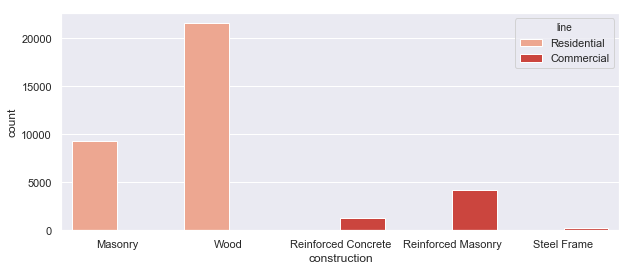

In [11]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x = "construction", hue = "line",palette="Reds", data = My_Data)
plt.show()

In [12]:
My_Data['county'].value_counts()

MIAMI DADE COUNTY      4315
BROWARD COUNTY         3193
PALM BEACH COUNTY      2791
DUVAL COUNTY           1894
ORANGE COUNTY          1811
PINELLAS COUNTY        1774
POLK COUNTY            1629
VOLUSIA COUNTY         1367
HILLSBOROUGH COUNTY    1166
MARION COUNTY          1138
OKALOOSA COUNTY        1115
SEMINOLE COUNTY        1100
ALACHUA COUNTY          973
BREVARD COUNTY          872
SANTA ROSA COUNTY       856
PASCO COUNTY            790
COLLIER COUNTY          787
LEE COUNTY              678
ST  JOHNS COUNTY        657
MANATEE COUNTY          518
ESCAMBIA COUNTY         494
SARASOTA COUNTY         417
CHARLOTTE COUNTY        414
BAY COUNTY              403
CITRUS COUNTY           384
INDIAN RIVER COUNTY     380
HIGHLANDS COUNTY        369
CLAY COUNTY             363
WALTON COUNTY           288
PUTNAM COUNTY           268
                       ... 
MONROE COUNTY           152
NASSAU COUNTY           135
LEVY COUNTY             126
COLUMBIA COUNTY         125
HERNANDO COUNTY     

> The plot below has : 
 - Y axis - County Details
 - X axis - Countof each county

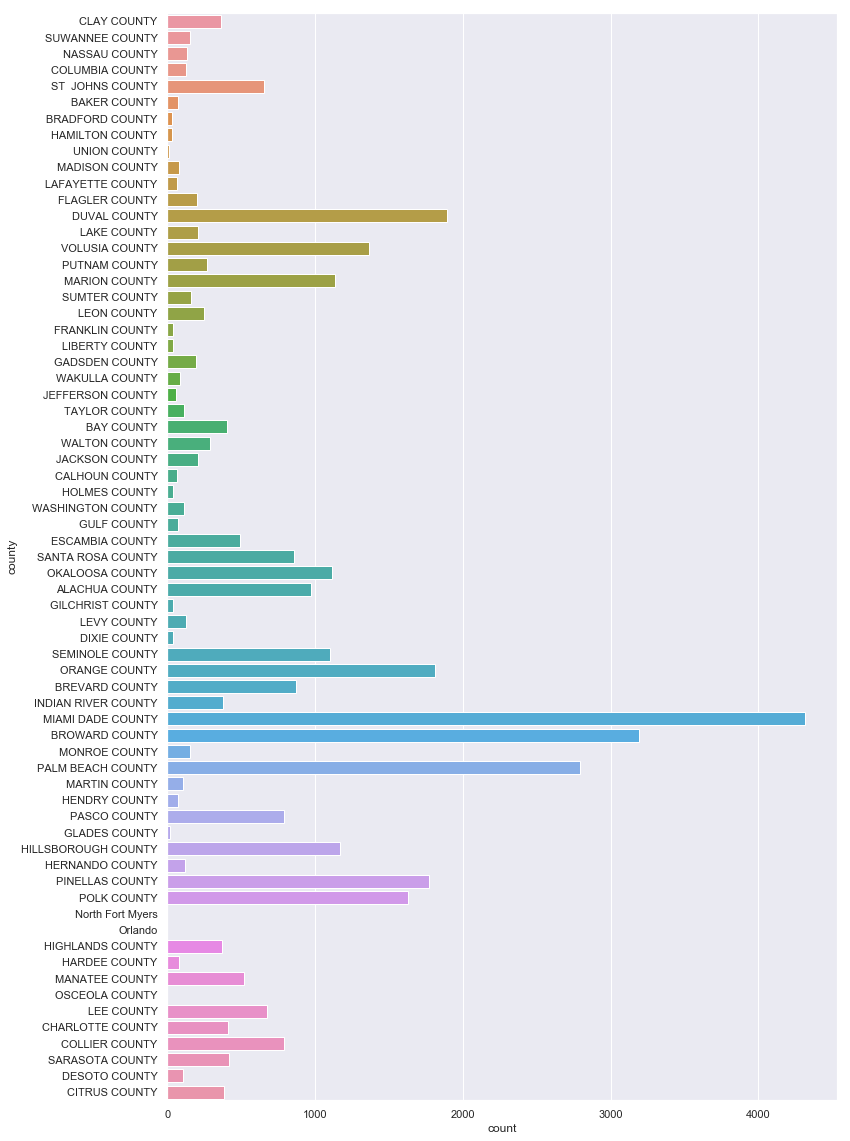

In [13]:
sns.set(rc={'figure.figsize':(12,20)})
sns.countplot(y= "county", data = My_Data)
plt.show()

> The plot below has : 
 - Y axis - County Details
 - X axis - Countof each county
 <br>
 <br>
> The color differences show Residence type houses are the Commercial type of houses

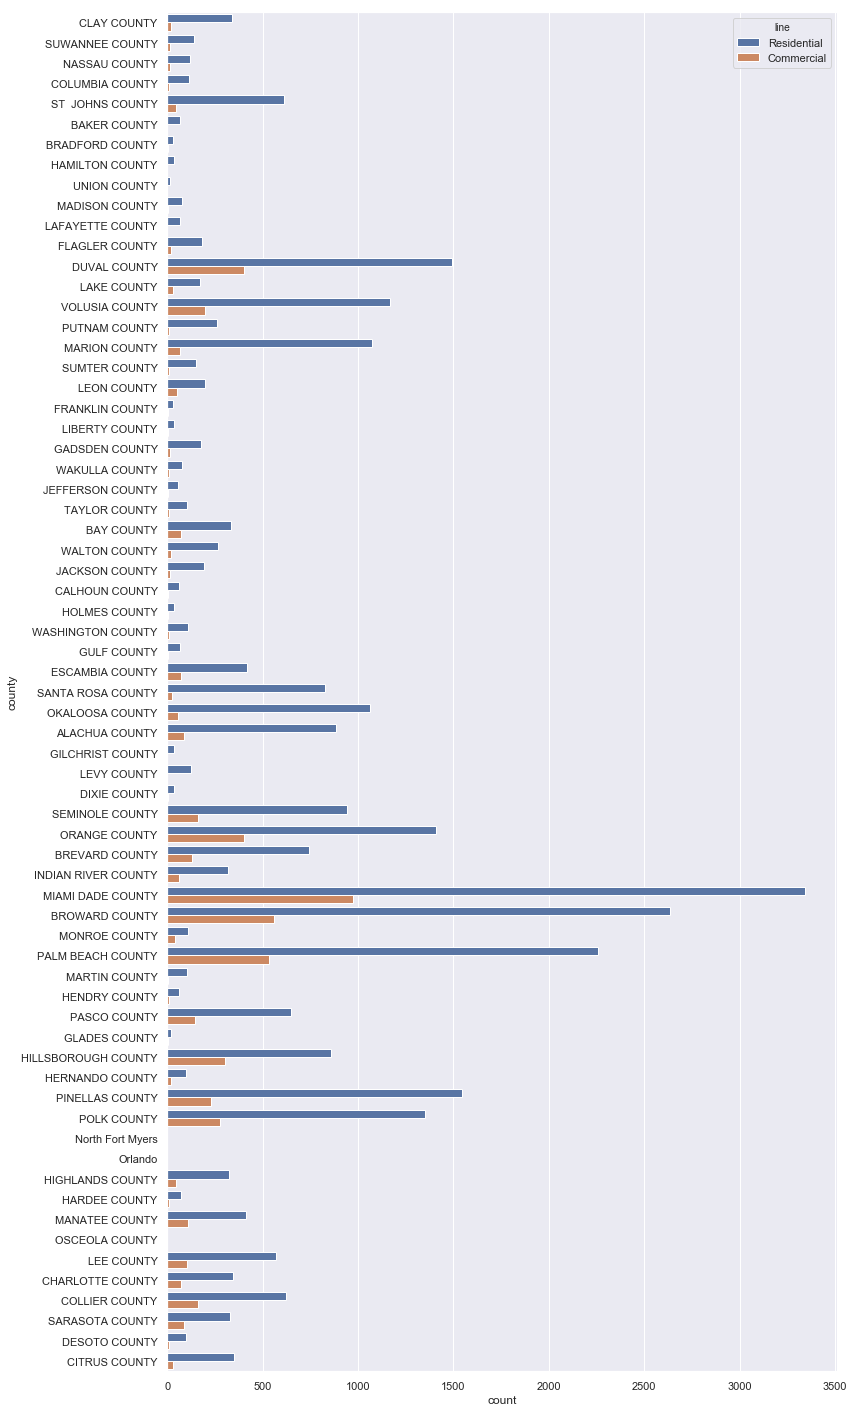

In [14]:
sns.set(rc={'figure.figsize':(12,25)})
sns.countplot(y= "county", hue = "line", data = My_Data)
plt.show()

> ### Numeric Data
- eq_site_limit
- hu_site_limit
- fl_site_limit
- fr_site_limit
- tiv_2011
- tiv_2012
- eq_site_deductible
- hu_site_deductible
- fl_site_deductible
- fr_site_deductible



In [15]:
My_Data.dtypes

policyID                int64
statecode              object
county                 object
eq_site_limit         float64
hu_site_limit         float64
fl_site_limit         float64
fr_site_limit         float64
tiv_2011              float64
tiv_2012              float64
eq_site_deductible    float64
hu_site_deductible    float64
fl_site_deductible    float64
fr_site_deductible      int64
point_latitude        float64
point_longitude       float64
line                   object
construction           object
point_granularity       int64
dtype: object

#### Taking only numeric values into a different dataframe to findout correlation

In [16]:
columns = My_Data.columns
# Dropping Categorical columns
drop_cols = ["policyID", "statecode", "county", "line", "construction","fl_site_amount","fr_site_amount", "hu_site_amount","eq_site_amount"]
cols_of_int = [item for item in columns if item not in drop_cols]
My_Data_int = My_Data[cols_of_int]

In [17]:
My_Data_int.columns

Index(['eq_site_limit', 'hu_site_limit', 'fl_site_limit', 'fr_site_limit',
       'tiv_2011', 'tiv_2012', 'eq_site_deductible', 'hu_site_deductible',
       'fl_site_deductible', 'fr_site_deductible', 'point_latitude',
       'point_longitude', 'point_granularity'],
      dtype='object')

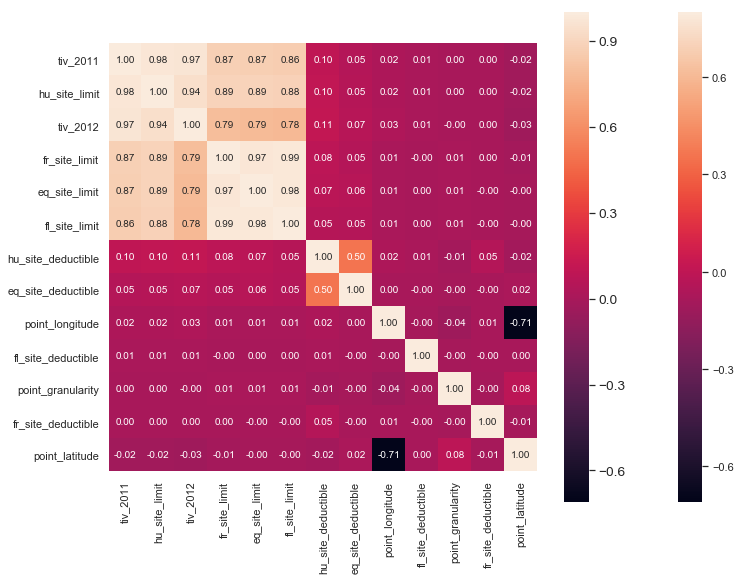

In [18]:
#correlation matrix
corrmat = My_Data_int.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
sns.set(rc={'figure.figsize':(10,10)})
#poly_inforce_qty correlation matrix
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'tiv_2011')['tiv_2011'].index
cm = np.corrcoef(My_Data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



### Patterns Observed
### Inferences : 
   - tiv_2011, hu_site_limit, eq_site_limit,  fl_site_limit, fr_site_limit had most correlation with the growth Total Insured Value for the next year
   
> That suggests the above columns had influenced the Total Insurance Value for the year 2012.
The highest correlation being Total Insured Value 2011. That is evident since Total Insurance Value would have a direct influence on the coming year's Total Insurance Value.
<br><br> 
 - Hurricane Site Limit influenced the Total Insured Value to the maximum (0.94). 
 - Followed by Earth Quake Site Limit (0.79)
 - Flood Site Limit (0.79)
 - Fire Damage Site Limit (0.79)
 
 

## Data Cleaning Process

> ### Transformations
- Generating new columns using two columns in the data
    - For Example: eq_site_amount = eq_site_limit - eq_site_deductible
- Likewise, generated new following features:
    - eq_site_amount
    - hu_site_amount
    - fl_site_amount
    - fr_site_amount

In [19]:
My_Data['eq_site_amount'] = My_Data['eq_site_limit']- My_Data['eq_site_deductible']
My_Data['hu_site_amount'] = My_Data['hu_site_limit']- My_Data['hu_site_deductible']
My_Data['fl_site_amount'] = My_Data['fl_site_limit']- My_Data['fl_site_deductible']
My_Data['fr_site_amount'] = My_Data['fr_site_limit']- My_Data['fr_site_deductible']

In [20]:
My_Data.columns

Index(['policyID', 'statecode', 'county', 'eq_site_limit', 'hu_site_limit',
       'fl_site_limit', 'fr_site_limit', 'tiv_2011', 'tiv_2012',
       'eq_site_deductible', 'hu_site_deductible', 'fl_site_deductible',
       'fr_site_deductible', 'point_latitude', 'point_longitude', 'line',
       'construction', 'point_granularity', 'eq_site_amount', 'hu_site_amount',
       'fl_site_amount', 'fr_site_amount'],
      dtype='object')

In [21]:
columns = My_Data.columns
# Dropping Categorical columns
drop_cols = ["eq_site_limit", "hu_site_limit", "fl_site_limit", "fr_site_limit", "eq_site_deductible",
            "hu_site_deductible","fl_site_deductible","fr_site_deductible"]
cols_of_int = [item for item in columns if item not in drop_cols]
My_Data = My_Data[cols_of_int]

In [22]:
My_Data.columns

Index(['policyID', 'statecode', 'county', 'tiv_2011', 'tiv_2012',
       'point_latitude', 'point_longitude', 'line', 'construction',
       'point_granularity', 'eq_site_amount', 'hu_site_amount',
       'fl_site_amount', 'fr_site_amount'],
      dtype='object')

In [23]:
#sns.pairplot(My_Data, x_vars="fl_site_amount", y_vars = "tiv_2011", kind = "scatter", height=5)
#plt.show()


- I had to deal with the data which varies from 0 to 300000.
- So I have decided to Standardize the data using the formula
- Value = [(Value - Mean) / Standard Deviation]


In [24]:
# Standardizing the Earth Quake liable amount
standardize_eq=(My_Data['eq_site_amount']-My_Data['eq_site_amount'].mean())/My_Data['eq_site_amount'].std()
My_Data['eq_site_amount'] = standardize_eq

# Standardizing the Hurricane liable amount
standardize_hu=(My_Data['hu_site_amount']-My_Data['hu_site_amount'].mean())/My_Data['hu_site_amount'].std()
My_Data['hu_site_amount'] = standardize_hu

# Standardizing the Flood liable amount
standardize_fl=(My_Data['fl_site_amount']-My_Data['fl_site_amount'].mean())/My_Data['fl_site_amount'].std()
My_Data['fl_site_amount'] = standardize_fl

# Standardizing the Fire liable amount
standardize_fr=(My_Data['fr_site_amount']-My_Data['fr_site_amount'].mean())/My_Data['fr_site_amount'].std()
My_Data['fr_site_amount'] = standardize_fr

In [25]:
#sns.pairplot(My_Data, x_vars="eq_site_amount", y_vars = "tiv_2012", kind = "scatter", height =5)
#plt.show()

In [26]:
My_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
policyID,36634.0,5.486619e+05,2.599129e+05,100074.000000,323647.750000,548525.000000,7.742520e+05,9.999710e+05
tiv_2011,36634.0,2.172875e+06,2.015015e+07,90.000000,45624.150000,202105.065000,9.465821e+05,2.160000e+09
tiv_2012,36634.0,2.571004e+06,2.036777e+07,73.370000,54013.512500,241630.985000,1.128871e+06,1.701000e+09
point_latitude,36634.0,2.808748e+01,1.647734e+00,24.547514,26.471996,28.057077,2.962300e+01,3.098982e+01
point_longitude,36634.0,-8.190357e+01,1.809066e+00,-87.447290,-82.439331,-81.585700,-8.037291e+01,-8.003326e+01
point_granularity,36634.0,1.640907e+00,1.070561e+00,1.000000,1.000000,1.000000,3.000000e+00,7.000000e+00
eq_site_amount,36634.0,3.010939e-15,1.000000e+00,-0.041706,-0.041706,-0.041706,-4.170622e-02,1.232449e+02
hu_site_amount,36634.0,3.378283e-16,1.000000e+00,-0.105302,-0.103140,-0.095565,-5.881146e-02,1.099182e+02
fl_site_amount,36634.0,1.747181e-15,1.000000e+00,-0.063822,-0.038051,-0.038051,-3.805069e-02,1.236652e+02
fr_site_amount,36634.0,-8.575646e-16,1.000000e+00,-0.056086,-0.056086,-0.056086,-5.283769e-02,1.221727e+02


### Summary 

> There are many inferences that we can make from the Data. Such as: 
- Miami Dade County has the highest number of residential and commercial lines
- All the commercial line's construction are either Reinforced Masonry, Reinforced Concrete, Steel Frame (There is no commercial space built with either wood or masonry)
- We can determine the county's where there is no either hurricane, or flood, or fire or earthquake damages are covered
- The difference in the tiv_2011 to tiv_2012 gives us an underlying feature of what kind of calamity has been caused
- We can also see the growth in insured value and find the underlying factors which are responsible for this hike.

>  Florida Insurance Portfolio Data Set has given me a way to think in the domain of insurance. 
- Few factors considered while quoting liable amount
- Calculations behind deductible amount in any insurance.


Lessons Learnt:
- First thing I have learnt is to beautifully document my work in the Jupyter Notebook
- I have learnt working with Jupyter Notebook
- I have learned a new library 'Basemap' which would help us plot 2D maps on Python
- Unfortunately I had a problem installing it, but I am still working on it.

## <font color = "green">THANK YOU </font>